## **COLORECTAL DISEASE CLASSIFICATION USING WCE IMAGES**

In [ ]:
#Import Libraries
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [ ]:
#Uploading the dataset
train_path = (r"D:\colon disease\train")
test_path = (r"D:\colon disease\test")
val_path = (r"D:\colon disease\val")

In [ ]:
#Dataset Exploration
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'0_normal': 300, '1_ulcerative_colitis': 300, '2_polyps': 300, '3_esophagitis': 300} 

 {'0_normal': 200, '1_ulcerative_colitis': 200, '2_polyps': 200, '3_esophagitis': 200} 

 {'0_normal': 100, '1_ulcerative_colitis': 100, '2_polyps': 100, '3_esophagitis': 100}


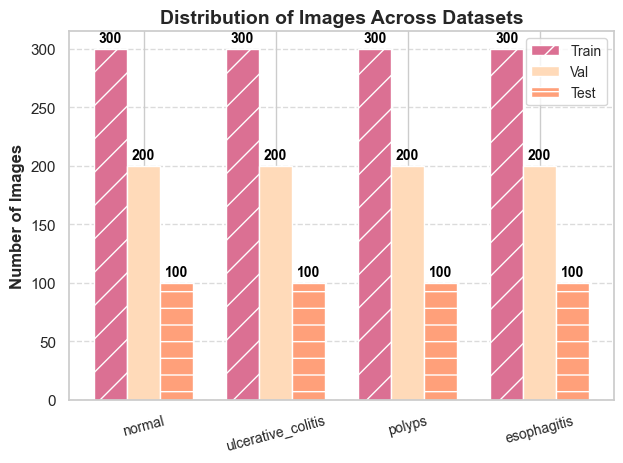

In [ ]:
#Distribution of Images Across Dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))
width = 0.25
sns.set(style="whitegrid")

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, train_list, width, label='Train', color='PaleVioletRed', hatch='/')
rects2 = ax.bar(x, val_list, width, label='Val', color='PeachPuff')
rects3 = ax.bar(x + width, test_list, width, label='Test', color='LightSalmon', hatch='-')

ax.set_ylabel('Number of Images', fontsize=12, weight='bold')
ax.set_title('Distribution of Images Across Datasets', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, fontsize=10)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

ax.bar_label(rects1, padding=3, fontsize=10, color='black', weight='bold')
ax.bar_label(rects2, padding=3, fontsize=10, color='black', weight='bold')
ax.bar_label(rects3, padding=3, fontsize=10, color='black', weight='bold')

fig.tight_layout()

plt.show()

In [ ]:
#Data Augmentation and Training Data Generation
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical'
                                              )

Found 1200 images belonging to 4 classes.


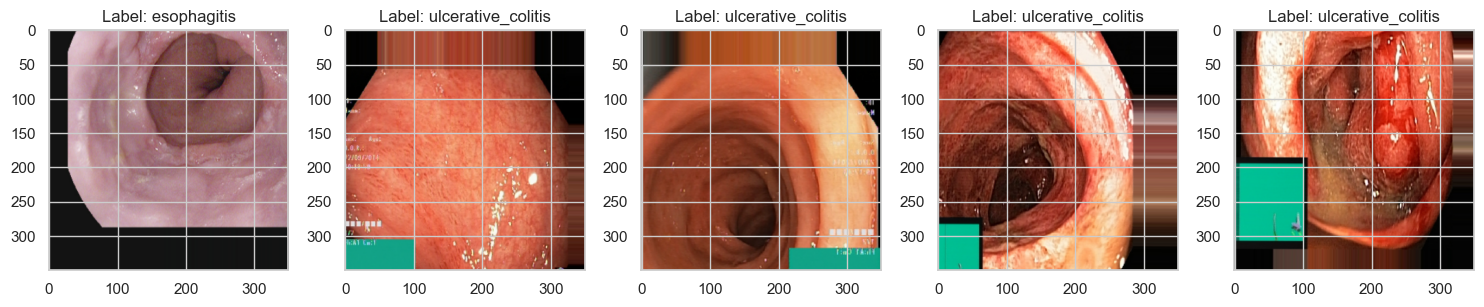

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your class labels
class_labels = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']

# Get a batch of images and labels
images, labels = next(train_data)

# Number of images to display
num_images = min(len(images), 5)  # Display up to 5 images

# Set up the figure and axes
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Display each image with its label
for i in range(num_images):
    ax = axes[i]
    img = images[i] * 255.0  # Convert to 0-255 range
    img = img.astype(np.uint8)  # Convert to uint8 for proper display
    ax.imshow(img)
    ax.axis('on')

    # Determine the label index and corresponding class name
    label_index = np.argmax(labels[i])  # Get the index of the highest probability
    ax.set_title(f'Label: {class_labels[label_index]}')  # Display class label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
#Data Augmentation and Validating Data Generation
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 800 images belonging to 4 classes.


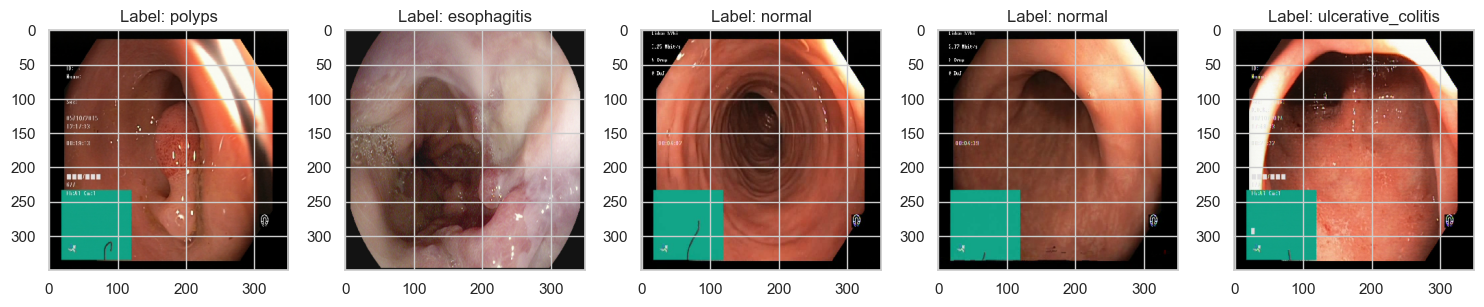

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your class labels
class_labels = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']

# Get a batch of images and labels
images, labels = next(val_data)

# Number of images to display
num_images = min(len(images), 5)  # Display up to 5 images

# Set up the figure and axes
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Display each image with its label
for i in range(num_images):
    ax = axes[i]
    img = images[i] * 255.0  # Convert to 0-255 range
    img = img.astype(np.uint8)  # Convert to uint8 for proper display
    ax.imshow(img)
    ax.axis('on')  # Turn off axis

    # Determine the label index and corresponding class name
    label_index = np.argmax(labels[i])  # Get the index of the highest probability
    ax.set_title(f'Label: {class_labels[label_index]}')  # Display class label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
#Data Augmentation and Testing Data Generation
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 400 images belonging to 4 classes.


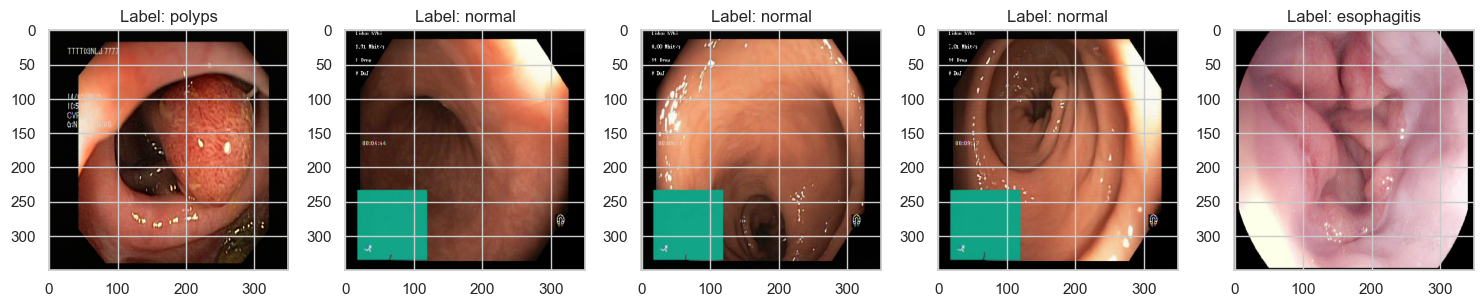

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your class labels
class_labels = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']

# Get a batch of images and labels
images, labels = next(test_data)

# Number of images to display
num_images = min(len(images), 5)  # Display up to 5 images

# Set up the figure and axes
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Display each image with its label
for i in range(num_images):
    ax = axes[i]
    img = images[i] * 255.0  # Convert to 0-255 range
    img = img.astype(np.uint8)  # Convert to uint8 for proper display
    ax.imshow(img)
    ax.axis('on')  # Turn off axis

    # Determine the label index and corresponding class name
    label_index = np.argmax(labels[i])  # Get the index of the highest probability
    ax.set_title(f'Label: {class_labels[label_index]}')  # Display class label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**CNN MODEL**

In [ ]:
#CNN Model Definition
model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)                   │ (None, 348, 348, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 346, 346, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 173, 173, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 171, 171, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 85, 85, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 83, 83, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 215168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      13,770,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,873,572 (52.92 MB)

 Trainable params: 13,873,572 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Defining Model Checkpoint Callback for CNN Model

mc = ModelCheckpoint(
    filepath="cnnmod.keras",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the model
cnn = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=call_back
)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.5445 - loss: 1.1720
Epoch 1: val_accuracy improved from -inf to 0.65750, saving model to cnnmod.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 183s 740ms/step - accuracy: 0.5451 - loss: 1.1704 - val_accuracy: 0.6575 - val_loss: 1.4558
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.8195 - loss: 0.5627
Epoch 2: val_accuracy improved from 0.65750 to 0.69125, saving model to cnnmod.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 166s 691ms/step - accuracy: 0.8196 - loss: 0.5622 - val_accuracy: 0.6913 - val_loss: 1.8702
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.8802 - loss: 0.3158
Epoch 3: val_accuracy did not improve from 0.69125
240/240 ━━━━━━━━━━━━━━━━━━━━ 170s 707ms/step - accuracy: 0.8803 - loss: 0.3157 - val_accuracy: 0.6850 - val_loss: 2.5829
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.8858 - loss: 0.3046
Epoch 4: val_accuracy did not improve from 0.69125
240/240 ━━━━━━━━

In [ ]:
#Saving the trained CNN model
model.save('cnnmod.keras')

In [ ]:
#Loading the model
model1=load_model('cnnmod.keras')

In [ ]:
# Evaluating and Printing the Accuracy of the Loaded CNN Model
cnn_accuracy = model1.evaluate(test_data)[1]
print(f"The accuracy of the model is = {cnn_accuracy*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.7293 - loss: 4.8131
The accuracy of the model is = 75.24999976158142 %


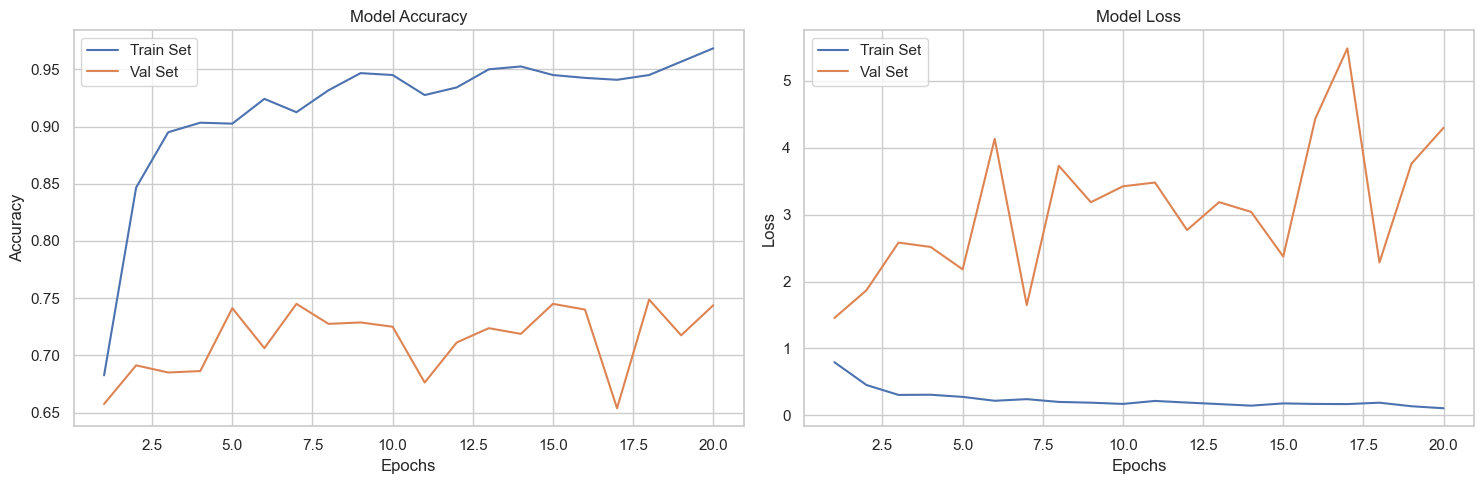

In [ ]:
# Plotting Model Performance (Accuracy and Loss) for CNN
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss =cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

**PREDICTION**

In [ ]:
#PREDICTION
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from PIL import Image

class_labels = ['normal','ulcerative_colitis','polyps','esophagitis']

# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(350, 350)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array


img_path = (r"D:\colon disease\Esophageal_ulcer.jpg")


img_array = load_and_preprocess_image(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Predicted class: esophagitis


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


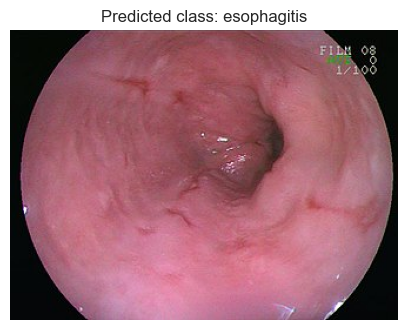

In [ ]:
#Image Classification Prediction and Visualization using Cnn model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

class_labels = ['normal','ulcerative_colitis','polyps','esophagitis']

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(350, 350)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# the image to test
img_path = (r"D:\colon disease\Esophageal_ulcer.jpg")

img_array = load_and_preprocess_image(img_path)

predictions = model_incep.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index[0]]

# Load the original image for display
img_to_display = Image.open(img_path)

# Plot the image and predicted class
plt.figure(figsize=(5, 5))
plt.imshow(img_to_display)
plt.title(f"Predicted class: {predicted_class_label}")
plt.axis('off')
plt.show()

**INCEPTIONV3 MODEL**

In [ ]:
#InceptionV3 Model Definition
from tensorflow.keras.applications.inception_v3 import InceptionV3

incep = InceptionV3(input_shape = (350, 350, 3),
                         include_top = False,
                         weights = 'imagenet')

In [ ]:
#Freezing InceptionV3 Layers
for layer in incep.layers:
    layer.trainable = False

In [ ]:
#Adding Custom Layers and Compiling the InceptionV3 Model
a = layers.Flatten()(incep.output)
a = layers.Dense(1024, activation='relu')(a)
a = layers.Dropout(0.2)(a)

a= layers.Dense(4, activation='sigmoid')(a)

model_incep = tf.keras.models.Model(incep.input, a)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
# Defining Model Checkpoint Callback for InceptionV3 Model

mc1 = ModelCheckpoint(
    filepath="incep.keras",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc1];

In [ ]:
# Fitting the Model
incep_v3 = model_incep.fit(
    train_data,
    epochs = 30,
    validation_data = val_data,
    callbacks = call_back
    )

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8646 - loss: 0.9726
Epoch 1: val_accuracy improved from 0.88250 to 0.95000, saving model to incep.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 739s 3s/step - accuracy: 0.8646 - loss: 0.9718 - val_accuracy: 0.9500 - val_loss: 0.3162
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9066 - loss: 0.6319
Epoch 2: val_accuracy did not improve from 0.95000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1016s 4s/step - accuracy: 0.9066 - loss: 0.6317 - val_accuracy: 0.9013 - val_loss: 0.6071
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9243 - loss: 0.4403
Epoch 3: val_accuracy did not improve from 0.95000
240/240 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - accuracy: 0.9243 - loss: 0.4402 - val_accuracy: 0.8438 - val_loss: 0.9890
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9183 - loss: 0.4847
Epoch 4: val_accuracy improved from 0.95000 to 0.95750, saving model to incep.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 733s 3

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9843 - loss: 0.1172
Epoch 26: val_accuracy did not improve from 0.96500
240/240 ━━━━━━━━━━━━━━━━━━━━ 665s 3s/step - accuracy: 0.9843 - loss: 0.1172 - val_accuracy: 0.9538 - val_loss: 0.4236
Epoch 27/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9741 - loss: 0.1025
Epoch 27: val_accuracy did not improve from 0.96500
240/240 ━━━━━━━━━━━━━━━━━━━━ 675s 3s/step - accuracy: 0.9741 - loss: 0.1026 - val_accuracy: 0.9513 - val_loss: 0.2998
Epoch 28/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9801 - loss: 0.0819
Epoch 28: val_accuracy did not improve from 0.96500
240/240 ━━━━━━━━━━━━━━━━━━━━ 828s 3s/step - accuracy: 0.9802 - loss: 0.0818 - val_accuracy: 0.9550 - val_loss: 0.3180
Epoch 29/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9792 - loss: 0.1075
Epoch 29: val_accuracy did not improve from 0.96500
240/240 ━━━━━━━━━━━━━━━━━━━━ 742s 3s/step - accuracy: 0.9792 - loss: 0.1075 - val_accuracy: 0.9613 - val_l

In [ ]:
#Evaluating the InceptionV3 Model on Test Data
loss,accuracy = model_incep.evaluate(test_data)
print(f'Test Accuracy: {accuracy}')

80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 527ms/step - accuracy: 0.9732 - loss: 0.1723
Test Accuracy: 0.9599999785423279


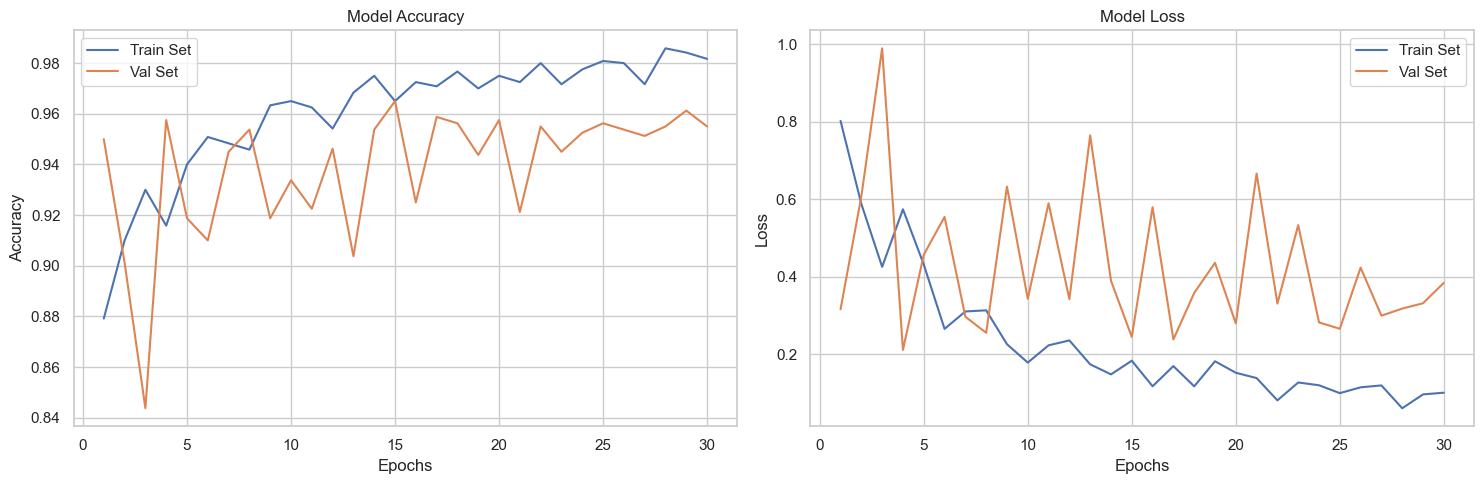

In [ ]:
#Plotting Model Performance (Accuracy and Loss) for InceptionV3
acc = incep_v3.history['accuracy']
val_acc = incep_v3.history['val_accuracy']
loss = incep_v3.history['loss']
val_loss = incep_v3.history['val_loss']
epochs_range = range(1, len(incep_v3.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

**PREDICTION**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from PIL import Image

# Define the class labels (assuming you have a list of class labels)
class_labels = ['normal','ulcerative_colitis','polyps','esophagitis']

# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(350, 350)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Path to the image you want to test
img_path = (r"D:\colon disease\test\1_ulcerative_colitis\test_ulcer_ (15).jpg")

# Preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction using the model object in memory
predictions = model_incep.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f"Predicted class: {class_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: ulcerative_colitis


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


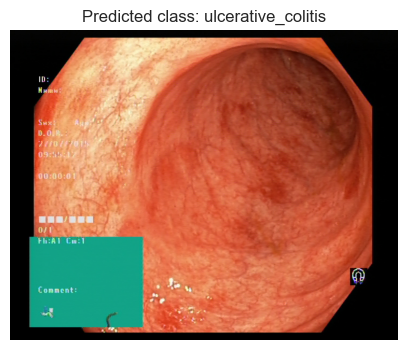

In [ ]:
#Image Classification Prediction and Visualization using InceptionV3 Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

class_labels = ['normal','ulcerative_colitis','polyps','esophagitis']

def load_and_preprocess_image(img_path, target_size=(350, 350)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array


img_path = (r"D:\colon disease\test\1_ulcerative_colitis\test_ulcer_ (15).jpg")

img_array = load_and_preprocess_image(img_path)

predictions = model_incep.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class_label = class_labels[predicted_class_index[0]]

img_to_display = Image.open(img_path)

plt.figure(figsize=(5, 5))
plt.imshow(img_to_display)
plt.title(f"Predicted class: {predicted_class_label}")
plt.axis('off')
plt.show()

In [ ]:
#Saving the Trained InceptionV3 Model
model_incep.save('incep.keras')

In [ ]:
#Loading the model
model2=load_model('incep.keras')

In [ ]:
# Evaluating and Printing the Accuracy of the Loaded InceptionV3 Model
incep_accuracy = model2.evaluate(test_data)[1]
print(f"The accuracy of the model is = {incep_accuracy*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 49s 578ms/step - accuracy: 0.9679 - loss: 0.1667
The accuracy of the model is = 95.99999785423279 %


**RESNET50 MODEL**

In [ ]:
#Loading Pre-Trained ResNet50 Model
from tensorflow.keras.applications import ResNet50

res_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet",
                      pooling='max')

In [ ]:
#Freezing CNN Layers
for layer in res_model.layers:
    layer.trainable = False

In [ ]:
#Defining the ResNet50 Model Architecture
resnetmod = Sequential()
resnetmod.add(res_model)
resnetmod.add(Dense(4, activation='sigmoid'))

In [ ]:
#Compiling the ResNet50 Model
resnetmod.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [ ]:
# Defining Model Checkpoint Callback for ResNet50 Model

mc = ModelCheckpoint(
    filepath="res.keras",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model

resnet = resnetmod.fit(
    train_data,
    epochs = 30,
    validation_data = val_data,
    callbacks = call_back
    )

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3026 - loss: 1.5451
Epoch 1: val_accuracy improved from -inf to 0.24250, saving model to res.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.3025 - loss: 1.5448 - val_accuracy: 0.2425 - val_loss: 1.5934
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2937 - loss: 1.4195
Epoch 2: val_accuracy improved from 0.24250 to 0.30875, saving model to res.keras
240/240 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.2937 - loss: 1.4194 - val_accuracy: 0.3088 - val_loss: 1.4185
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.3074 - loss: 1.4135
Epoch 3: val_accuracy did not improve from 0.30875
240/240 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.3074 - loss: 1.4135 - val_accuracy: 0.2975 - val_loss: 1.4153
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.2885 - loss: 1.3964
Epoch 4: val_accuracy did not improve from 0.30875
240/240 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/

In [ ]:
#Saving the Trained ResNet50 Model
resnetmod.save('res.keras')

In [ ]:
#Loading the model
model3=load_model('res.keras')

In [ ]:
#Evaluating and Printing the Accuracy of the Loaded ResNet50 Model
resnet_accuracy = model3.evaluate(test_data)[1]
print(f"The accuracy of the model is = {resnet_accuracy*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 755ms/step - accuracy: 0.3572 - loss: 1.1243
The accuracy of the model is = 37.5 %


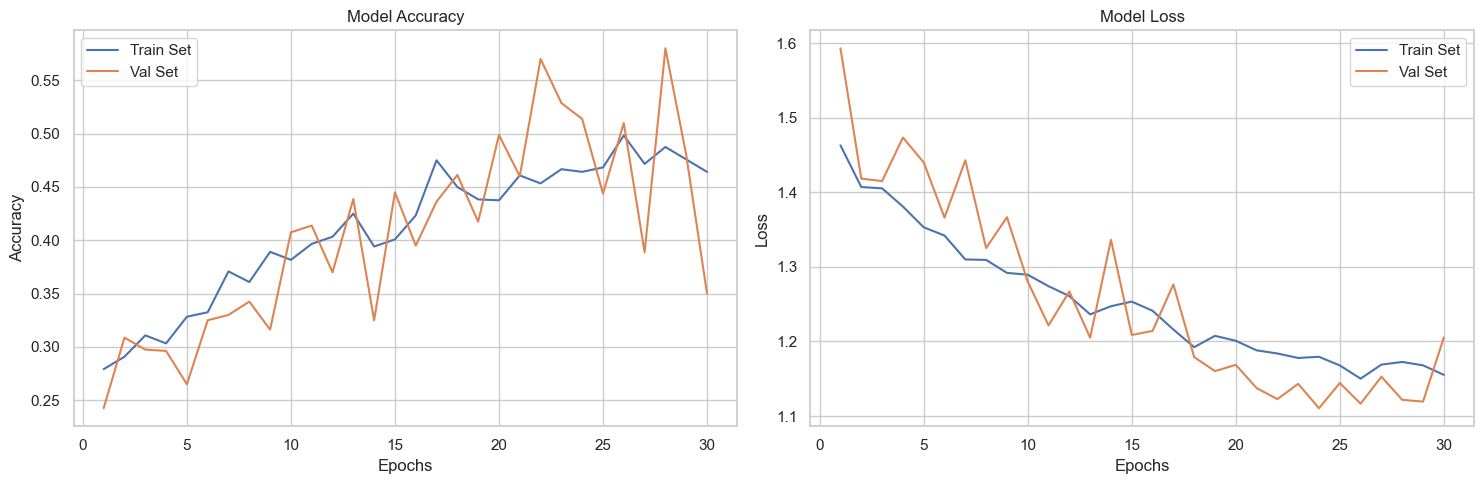

In [ ]:
# Plotting Model Performance (Accuracy and Loss) for ResNet50 model
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss =resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

**COMPARSION**

In [ ]:
# Checking the Accuracy of the Model
cnn_accuracy = model1.evaluate(test_data)[1]
print(f"The accuracy of the model is = {cnn_accuracy*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.7491 - loss: 4.6927
The accuracy of the model is = 75.24999976158142 %


In [ ]:
# Checking the Accuracy of the Model
incep_accuracy = model2.evaluate(test_data)[1]
print(f"The accuracy of the model is = {incep_accuracy*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 597ms/step - accuracy: 0.9712 - loss: 0.1798
The accuracy of the model is = 95.99999785423279 %


In [ ]:
# Checking the Accuracy of the Model
accuracy_res = model3.evaluate(test_data)[1]
print(f"The accuracy of the model is = {accuracy_res*100} %")

80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 885ms/step - accuracy: 0.3714 - loss: 1.1672
The accuracy of the model is = 37.5 %


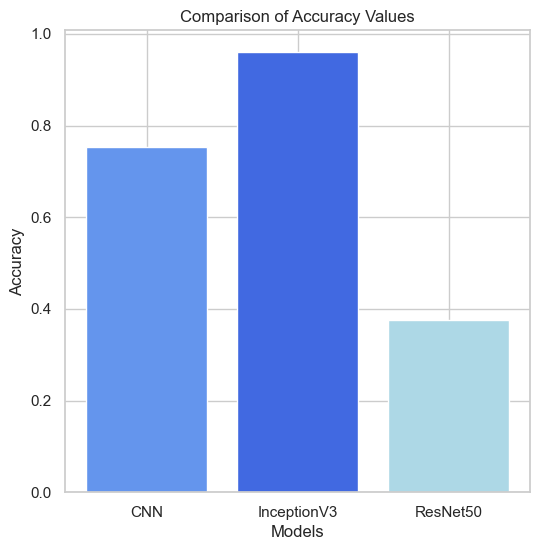

In [ ]:
labels = ['CNN','InceptionV3','ResNet50']
values = [cnn_accuracy,incep_accuracy,resnet_accuracy]

plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['CornflowerBlue','RoyalBlue','LightBlue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Values')
plt.show()